# Exploring and Clustering Venues in Jersey City  Neighborhoods

- [Introduction](#Introduction)
- [Data Collection](#Introduction)
- [Methdology](#Methodology)
- [Analysis: Clustering and Segmenting](#Analysis:-Clustering-and-Segmenting)
- [Results and Discussion](#Results-and-Discussion)
- [Conclusion](#Conclusion)

## Introduction

The aim of the project is to identify venues and affordable housing in the Jersey City neighborhoods. We will also explore and rate the resturants in the Jersey City districts based on the number of likes acquired by them. In this notebook, venues and number of likes will be procured in the Jersey City, using Foursquare API, to help people distinguish between the house affordibility of the districts and explore the best resturant of their liking.

Whenever a person decides to settle down in a new city they start looking for affordable places to live and venues to hang out and resturants usually makes it to the top of the list. They primarily look for best places to have regular meals around the locality they decide to live in

Here, we'll identify places that are fit for various individuals based on the information collected from the Foursquare API and machine learning algorithm. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.

In [1]:
import geopandas as gpd
import gdal
import shapely

from zipfile import ZipFile
import shapefile
from shapely.geometry import shape

import io

import numpy as np # library to handle data in a vectorized manner
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests # library to handle requests
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


## Data Collection

Data with Jersey City neighborhood and district locations in the form of shape and Geojson files are obtained from **Jersey city government website (jerseycitynj.gov)**. Foursquare API is used to fetch 100 venues within 800 metres of Jersey City neighborhoods. House affordibility of districts are calculated based on the avaliability of number of affordable housing units in each district, which is also obtained from **Jersey city government website**. 

### Jersey City

Located between the Hudson and Hackensack Rivers, Jersey City covers nearly 15 square miles of land at the center of the New York City metropolitan region. City is known for historical points of interest.

Shapefile of the map of Jersey City neighborhoods is downloaded.  Geopandas is used to extract the boundary coordinates for each neighborhood.

In [3]:
df = gpd.read_file("zip:///Users/ryash/Downloads/neighborhoods.zip/Neighborhoods3.shp")
#source: https://data.jerseycitynj.gov/explore/dataset/jersey-city-neighborhoods/information/
df

,AREA,ACRES,District,Nghbhd,Color,geometry
0,4.116014e+08,9449.068,Greenville,Our Lady of Mercy,None,"POLYGON ((602197.354 678520.304, 602603.750 67..."
1,4.116014e+08,9449.068,Downtown,Van Vorst Park,21,"POLYGON ((617677.977 688263.622, 618825.146 68..."
2,4.116014e+08,9449.068,Heights,Meadowlands,None,"POLYGON ((616200.323 702386.273, 616135.370 70..."
3,4.116014e+08,9449.068,Heights,Western Slope,None,"POLYGON ((615139.529 697738.495, 614630.955 69..."
4,4.116014e+08,9449.068,Heights,Hudson City,None,"POLYGON ((617902.283 695254.291, 617222.493 69..."
5,4.116014e+08,9449.068,Heights,Washington Village,None,"POLYGON ((618532.896 694010.330, 617975.743 69..."
6,4.116014e+08,9449.068,Heights,Mount Pleasant,None,"POLYGON ((618997.261 697527.224, 617617.053 69..."
7,4.116014e+08,9449.068,Heights,Sparrow Hill,None,"POLYGON ((614630.955 696734.867, 615715.993 69..."
8,4.116014e+08,9449.068,Heights,Resorvior,None,"POLYGON ((614702.693 694542.372, 615926.724 69..."
9,4.116014e+08,9449.068,Heights,Palisade,None,"POLYGON ((617272.410 692999.287, 617128.287 69..."


Obtaining the geographical cordinates i.e., the Latitude and Longitude variables from the projected coordinates in the shapefile.

In [247]:
df1 = df.copy()
df1.to_crs(epsg=4269, inplace=True)
df1["center"] = df1["geometry"].centroid
df1.set_geometry("center", inplace = True)
df1.head()

<ipython-input-247-3c16fd13b735>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df1["center"] = df1["geometry"].centroid


,AREA,ACRES,District,Nghbhd,Color,geometry,center
0,4.116014e+08,9449.068,Greenville,Our Lady of Mercy,None,"POLYGON ((-74.10302 40.69552, -74.10154 40.696...",POINT (-74.09659 40.70176)
1,4.116014e+08,9449.068,Downtown,Van Vorst Park,21,"POLYGON ((-74.04701 40.72205, -74.04288 40.719...",POINT (-74.04723 40.71894)
2,4.116014e+08,9449.068,Heights,Meadowlands,None,"POLYGON ((-74.05208 40.76084, -74.05231 40.760...",POINT (-74.06543 40.75446)
3,4.116014e+08,9449.068,Heights,Western Slope,None,"POLYGON ((-74.05599 40.74810, -74.05785 40.745...",POINT (-74.05501 40.75300)
4,4.116014e+08,9449.068,Heights,Hudson City,None,"POLYGON ((-74.04607 40.74124, -74.04851 40.742...",POINT (-74.04926 40.74832)


In [248]:
df1['Longitude'] = df1.center.x
df1['Latitude'] = df1.center.y
df1.head()

,AREA,ACRES,District,Nghbhd,Color,geometry,center,Longitude,Latitude
0,4.116014e+08,9449.068,Greenville,Our Lady of Mercy,None,"POLYGON ((-74.10302 40.69552, -74.10154 40.696...",POINT (-74.09659 40.70176),-74.096585,40.701758
1,4.116014e+08,9449.068,Downtown,Van Vorst Park,21,"POLYGON ((-74.04701 40.72205, -74.04288 40.719...",POINT (-74.04723 40.71894),-74.047234,40.718943
2,4.116014e+08,9449.068,Heights,Meadowlands,None,"POLYGON ((-74.05208 40.76084, -74.05231 40.760...",POINT (-74.06543 40.75446),-74.065425,40.754461
3,4.116014e+08,9449.068,Heights,Western Slope,None,"POLYGON ((-74.05599 40.74810, -74.05785 40.745...",POINT (-74.05501 40.75300),-74.055014,40.753003
4,4.116014e+08,9449.068,Heights,Hudson City,None,"POLYGON ((-74.04607 40.74124, -74.04851 40.742...",POINT (-74.04926 40.74832),-74.049258,40.748321


## Data Cleaning

Data is prepared for analysis by manuplating the format of the data and appending it with associated information obtained from various sources. 

Changing the name of the columns and keeping the desired columns

In [249]:
df2 = df1.copy()

In [250]:
df2 = df1[['District', 'Nghbhd', 'Latitude', 'Longitude']]
df2.columns = ['District', 'Neighborhood', 'Latitude', 'Longitude']
df2.head()

,District,Neighborhood,Latitude,Longitude
0,Greenville,Our Lady of Mercy,40.701758,-74.096585
1,Downtown,Van Vorst Park,40.718943,-74.047234
2,Heights,Meadowlands,40.754461,-74.065425
3,Heights,Western Slope,40.753003,-74.055014
4,Heights,Hudson City,40.748321,-74.049258


Checking if their are dupelicate values for the neighborhood column, there seems to  be two ( Bayside and Jackson Hill). However, the neighborhoods with the same name belong to two different districts of the Jersey City, hence are kept in the dataset.

In [251]:
df2['Neighborhood'].value_counts()

Bayside                 2
Jackson Hill            2
Van Vorst Park          1
Exchange Place          1
Hudson City             1
Harsimus Cove           1
Western Slope           1
Bates                   1
Canal Crossing          1
Resorvior               1
Van Leer                1
Hackensack              1
St Pauls                1
Bergen Hill             1
The Island              1
Harborside              1
Palus Hook              1
Village                 1
Powerhouse              1
Lafayette               1
Newport                 1
Harbor Place            1
Port Liberte            1
State College           1
St Joes                 1
Waverly                 1
Hamilton Park           1
St. Pete                1
Sparrow Hill            1
Lincoln Park            1
Hoboken Yards           1
Metroplaza              1
Society Hill            1
Mill Creek              1
St. Aedens              1
West Side               1
Liberty Harbor          1
Our Lady of Mercy       1
LSP Industri

In [252]:
dupe = df2[df2['Neighborhood'].isin(['Jackson Hill', 'Bayside'])]
dupe

,District,Neighborhood,Latitude,Longitude
40,Greenville,Bayside,40.712526,-74.099631
42,Bergen-Lafayette,Jackson Hill,40.711446,-74.076838
50,Greenville,Jackson Hill,40.700791,-74.085503
52,West Side,Bayside,40.720676,-74.093009


There are 53 neighborhoods in the Jersey City districts.

In [253]:
df2.Neighborhood.shape[0]

53

Dataset is named as **jc_data** and geographical coordinates are obtained for the Jersey City using geopy library

In [12]:
jc_data = df2.copy()

In [13]:
address = 'Jersey City, New Jersey'

geolocator = Nominatim(user_agent="JC_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Jersey City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Jersey City are 40.7281575, -74.0776417.


Visualization of the Jersey City neighborhoods can be seen below.

In [14]:

# create map of Toronto using latitude and longitude values
map_jc = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, district, neighborhood in zip(jc_data['Latitude'],jc_data['Longitude'],jc_data['District'],jc_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jc)  
    
map_jc

#### Defining Foursquare Credentials and Version

Utilizing the Foursquare API to explore the neighborhoods and segment them. Foursquare credentials are hidden

In [15]:
CLIENT_ID = 'R4STRF2JJMU0M0V5W1Z0PXAYI3DYNF2NGV1GPEGDJRALW50R' # your Foursquare ID
CLIENT_SECRET = 'BNJARBKMIHZML2TRUEM34TWENV1J30M0SSFAL4UVXHB3PR0X' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: R4STRF2JJMU0M0V5W1Z0PXAYI3DYNF2NGV1GPEGDJRALW50R
CLIENT_SECRET:BNJARBKMIHZML2TRUEM34TWENV1J30M0SSFAL4UVXHB3PR0X


### Exploring the Jersey City neighborhood venues using foursquare API

We begin by fetching a total of all venues in Jersey City upto a range of 800 meters using the Foursquare API. The Foursquare API has the explore API which allows us to find venue information within a given radius from the given coordinates. We will use this API to find all the venues for each neighborhood.

We define the get_category_type function to get the correct category for each venue.

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Obtaining the top 100 venues that are in Jersey City within a radius of 800 meters.

Creating the GET request URL. Naming the URL as url and sending the GET request. Also, creating a function to extract the information about the neighborhood venues in Jersey City. We'll call the API to obtain all venues for each neighborhood within the given distance. The maximum venues this API can fetch is 100, so we will fetch all venues by iteratively calling this API.

In [17]:
LIMIT = 100
radius = 800


In [18]:
def getNearbyVenues(districts, neighborhoods, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for dist, neigh, lat, lng in zip(districts, neighborhoods, latitudes, longitudes):
        print(neigh)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            dist,
            neigh,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name'],
            #v['venue']['location']['postalCode'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Category',
                  'Venue id']
                  #'Venue id'
    
    return(nearby_venues)

Writing the code to run the above function on each neighborhood and creating a new dataframe called **jc_venues**.

In [19]:
jc_venues = getNearbyVenues(districts=jc_data['District'],
                             neighborhoods = jc_data['Neighborhood'],
                             latitudes=jc_data['Latitude'],
                             longitudes=jc_data['Longitude']
                            )

Our Lady of Mercy
Van Vorst Park
Meadowlands
Western Slope
Hudson City
Washington Village
Mount Pleasant
Sparrow Hill
Resorvior
Palisade
Waverly
Newport
Exchange Place
Palus Hook
Powerhouse
Metroplaza
Harborside
Hamilton Park
Van Leer
Liberty Harbor
Harbor Place
Bates
Village
West End
St Joes
The Island
St. Aedens
Mill Creek
Hackensack
Marion
Journal Square
St. Pete
Lincoln Park
Bergen Hill
Lafayette
Canal Crossing
Liberty State Park
Port Liberte
Greenville Yards
Society Hill
Bayside
St Pauls
Jackson Hill
West Side
State College
Country Village
Harsimus Cove
Gregory Park
Lafayette Industrial
Hoboken Yards
Jackson Hill
LSP Industrial
Bayside


Checking the size of the resulting dataframe

In [20]:
print(jc_venues.shape)
print(len(jc_venues))

(2796, 9)
2796


Counting the venues returned for each neighborhood

In [21]:
print('There are {} uniques categories.'.format(len(jc_venues['Venue Category'].unique())))

There are 224 uniques categories.


Venue id column is not needed for the analysis for now hence is removed from the dataset and is termed as **jc_venues_f**

In [22]:
jc_venues_f = jc_venues.drop(columns = 'Venue id')
jc_venues_f.head(30)

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,Jollibee,40.704080,-74.098722,Fried Chicken Joint
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Wonder Bagels,40.706182,-74.101895,Bagel Shop
3,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant
4,Greenville,Our Lady of Mercy,40.701758,-74.096585,Vincent's Pizza,40.700129,-74.097658,Pizza Place
5,Greenville,Our Lady of Mercy,40.701758,-74.096585,Neptune Bakery & Deli,40.696353,-74.098296,Bakery
6,Greenville,Our Lady of Mercy,40.701758,-74.096585,Walgreens,40.695689,-74.099667,Pharmacy
7,Greenville,Our Lady of Mercy,40.701758,-74.096585,Vinnie's Pizzeria III,40.705290,-74.099190,Pizza Place
8,Greenville,Our Lady of Mercy,40.701758,-74.096585,Subway,40.704465,-74.098885,Sandwich Place
9,Greenville,Our Lady of Mercy,40.701758,-74.096585,PNC Bank,40.704700,-74.098910,Bank


## Methodology

A dummy variable is created for each venue category type using one hot encoding and neighborhood names column is appended to the **jc_onehot**

In [23]:
# one hot encoding
jc_onehot = pd.get_dummies(jc_venues_f[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jc_onehot['Neighborhood'] = jc_venues_f['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [jc_onehot.columns[-1]] + list(jc_onehot.columns[:-1])
jc_onehot = jc_onehot[fixed_columns]

jc_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Quad,Colombian Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Emergency Room,Empanada Restaurant,Event Service,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jiangsu Restaurant,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Toll Plaza,Toy / Game Store,Track,Trade School,Trail,Train,Train Station,Tunnel,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Our Lady of Mercy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Our Lady of Mercy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [24]:
jc_onehot.shape

(2796, 225)

#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category and named as **jc_grouped**

In [25]:
jc_grouped = jc_onehot.groupby('Neighborhood').mean().reset_index()
jc_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Garden,Big Box Store,Bike Rental / Bike Share,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Quad,Colombian Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Emergency Room,Empanada Restaurant,Event Service,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jiangsu Restaurant,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Light Rail Station,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Toll Plaza,Toy / Game Store,Track,Trade School,Trail,Train,Train Station,Tunnel,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bates,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.083333,0.000000,0.083333,0.000000,0.00000,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.020833,0.020833,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.020833

Confirming the new size

In [26]:
jc_grouped.shape

(51, 225)

#### Printing each neighborhood along with the top 5 most common venues

In [27]:
num_top_venues = 5

for hood in jc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = jc_grouped[jc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bates----
                       venue  freq
0                        Bar  0.08
1                     Bakery  0.08
2       Gym / Fitness Center  0.06
3                    Theater  0.04
4  Middle Eastern Restaurant  0.04


----Bayside----
                  venue  freq
0            Shoe Store  0.04
1  Fast Food Restaurant  0.04
2      Department Store  0.04
3          Liquor Store  0.03
4        Hardware Store  0.03


----Bergen Hill----
                  venue  freq
0    Chinese Restaurant  0.08
1  Fast Food Restaurant  0.06
2        Sandwich Place  0.06
3    Italian Restaurant  0.06
4    Mexican Restaurant  0.04


----Canal Crossing----
                venue  freq
0         Coffee Shop  0.10
1                Park  0.10
2  Light Rail Station  0.10
3          Restaurant  0.05
4                 Bar  0.05


----Country Village----
            venue  freq
0     Pizza Place  0.09
1        Pharmacy  0.06
2  Baseball Field  0.06
3      Donut Shop  0.03
4    Tennis Court  0.03


----Exchang

#### Placing the above result into *pandas* dataframe

Writing a function to sort the venues in descending order.

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Creating the new dataframe and display the top 10 venues for each neighborhood.

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = jc_grouped['Neighborhood']

for ind in np.arange(jc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(jc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bates,Bar,Bakery,Gym / Fitness Center,Grocery Store,Burger Joint,Theater,Middle Eastern Restaurant,Coffee Shop,Convenience Store,Seafood Restaurant
1,Bayside,Department Store,Fast Food Restaurant,Shoe Store,Grocery Store,Bank,Clothing Store,Liquor Store,Filipino Restaurant,Pizza Place,Cosmetics Shop
2,Bergen Hill,Chinese Restaurant,Italian Restaurant,Sandwich Place,Fast Food Restaurant,Bar,Gym,American Restaurant,Latin American Restaurant,Pharmacy,Café
3,Canal Crossing,Light Rail Station,Coffee Shop,Park,Dumpling Restaurant,Caribbean Restaurant,Bar,Toll Booth,Business Service,Sandwich Place,Distillery
4,Country Village,Pizza Place,Pharmacy,Baseball Field,Chinese Restaurant,Tennis Court,Fried Chicken Joint,Deli / Bodega,Bus Stop,Miscellaneous Shop,Café


#### Finging the best cluster number (K)

In [30]:
jc_grouped_clustering = jc_grouped.drop('Neighborhood', 1)

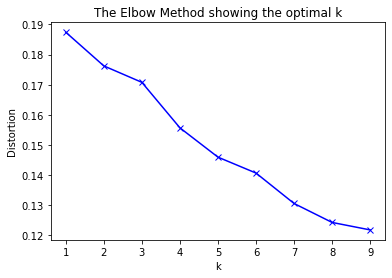

In [31]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(jc_grouped_clustering)
    kmeanModel.fit(jc_grouped_clustering)
    distortions.append(sum(np.min(cdist(jc_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / jc_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Clustering neighborhoods

Running *k*-means to cluster the neighborhood into 7 clusters.

In [34]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:100] 

array([1, 1, 1, 1, 0, 1, 5, 1, 0, 1, 1, 1, 1, 1, 0, 1, 4, 3, 1, 1, 1, 2,
       1, 4, 6, 1, 1, 0, 1, 0, 0, 1, 3, 1, 4, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 4, 0, 0])

#### Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

jc_merged = jc_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
jc_merged= jc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

jc_merged.head() # check the last columns!

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,0,Baseball Field,Pharmacy,Pizza Place,Intersection,Bank,Bakery,Miscellaneous Shop,Spanish Restaurant,Fried Chicken Joint,Chinese Restaurant
1,Downtown,Van Vorst Park,40.718943,-74.047234,1,Pizza Place,Gym / Fitness Center,Taco Place,Coffee Shop,Bar,Bakery,Gym,Grocery Store,Café,Italian Restaurant
2,Heights,Meadowlands,40.754461,-74.065425,6,Train,Convenience Store,Gun Range,Electronics Store,Train Station,Liquor Store,Donut Shop,Falafel Restaurant,Dumpling Restaurant,Farmers Market
3,Heights,Western Slope,40.753003,-74.055014,0,Bakery,Hotel,Deli / Bodega,Donut Shop,Pizza Place,Chinese Restaurant,Sandwich Place,Liquor Store,Café,Shoe Repair
4,Heights,Hudson City,40.748321,-74.049258,0,Pizza Place,Italian Restaurant,Chinese Restaurant,Park,Coffee Shop,Pharmacy,Deli / Bodega,Farmers Market,Liquor Store,Café


#### Visualizing the resulting clusters

In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jc_merged['Latitude'], jc_merged['Longitude'], jc_merged['Neighborhood'],jc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
cluster0 = jc_merged[jc_merged['Cluster Labels'] == 0]
cluster0

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,0,Baseball Field,Pharmacy,Pizza Place,Intersection,Bank,Bakery,Miscellaneous Shop,Spanish Restaurant,Fried Chicken Joint,Chinese Restaurant
3,Heights,Western Slope,40.753003,-74.055014,0,Bakery,Hotel,Deli / Bodega,Donut Shop,Pizza Place,Chinese Restaurant,Sandwich Place,Liquor Store,Café,Shoe Repair
4,Heights,Hudson City,40.748321,-74.049258,0,Pizza Place,Italian Restaurant,Chinese Restaurant,Park,Coffee Shop,Pharmacy,Deli / Bodega,Farmers Market,Liquor Store,Café
6,Heights,Mount Pleasant,40.750580,-74.043310,0,Pizza Place,Bakery,Pharmacy,Gym,Coffee Shop,Grocery Store,Sandwich Place,Chinese Restaurant,Spanish Restaurant,Donut Shop
9,Heights,Palisade,40.734287,-74.052132,0,Pizza Place,Deli / Bodega,Bakery,Restaurant,Café,Donut Shop,Sandwich Place,Dance Studio,Filipino Restaurant,Butcher
24,Journal Sq,St Joes,40.730209,-74.056146,0,Pizza Place,Bakery,Deli / Bodega,Indian Restaurant,Bank,Café,Fried Chicken Joint,Restaurant,Sandwich Place,Hot Dog Joint
25,Journal Sq,The Island,40.726978,-74.058338,0,Pizza Place,Gym,Pharmacy,Bakery,Hot Dog Joint,Restaurant,Gym / Fitness Center,American Restaurant,Bank,Theater
28,West Side,Hackensack,40.735520,-74.085147,0,Pizza Place,Scenic Lookout,Bagel Shop,Train,Liquor Store,General Travel,Track,Golf Course,Bus Station,Gun Range
39,Greenville,Society Hill,40.708450,-74.103678,0,Pizza Place,Liquor Store,Chinese Restaurant,Baseball Field,Bank,Cosmetics Shop,Bagel Shop,Dance Studio,Supermarket,Fried Chicken Joint
41,Greenville,St Pauls,40.692952,-74.094985,0,Pharmacy,Park,Donut Shop,Pizza Place,Ice Cream Shop,Rental Car Location,Tennis Court,Liquor Store,Basketball Court,Chinese Restaurant


In [38]:
cluster1 = jc_merged[jc_merged['Cluster Labels'] == 1]
cluster1

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown,Van Vorst Park,40.718943,-74.047234,1,Pizza Place,Gym / Fitness Center,Taco Place,Coffee Shop,Bar,Bakery,Gym,Grocery Store,Café,Italian Restaurant
5,Heights,Washington Village,40.743890,-74.042810,1,Italian Restaurant,Gym,Pizza Place,Bar,Bakery,Deli / Bodega,Coffee Shop,Café,Ice Cream Shop,Sandwich Place
7,Heights,Sparrow Hill,40.743169,-74.060263,1,Italian Restaurant,Park,Deli / Bodega,Bar,Café,Motel,Liquor Store,Chinese Restaurant,Gun Range,Pizza Place
10,Heights,Waverly,40.739196,-74.050625,1,Italian Restaurant,Liquor Store,Pizza Place,Donut Shop,Ice Cream Shop,Dance Studio,Bus Line,Gym,Bar,Coffee Shop
11,Downtown,Newport,40.729255,-74.034927,1,Cosmetics Shop,Fast Food Restaurant,Ice Cream Shop,Café,Waterfront,Furniture / Home Store,Coffee Shop,Mexican Restaurant,Fried Chicken Joint,Italian Restaurant
12,Downtown,Exchange Place,40.716458,-74.033539,1,Coffee Shop,Café,American Restaurant,Gym,Food Truck,Waterfront,Liquor Store,Sandwich Place,Hotel,Pizza Place
13,Downtown,Palus Hook,40.714147,-74.038187,1,Café,American Restaurant,Coffee Shop,Gym,Pizza Place,Hotel,Food Truck,Italian Restaurant,Liquor Store,Park
14,Downtown,Powerhouse,40.720634,-74.038459,1,Coffee Shop,Hotel,Pizza Place,American Restaurant,Bar,Gym / Fitness Center,Italian Restaurant,Mexican Restaurant,Café,Ice Cream Shop
15,Downtown,Metroplaza,40.723239,-74.036622,1,Coffee Shop,Italian Restaurant,Cosmetics Shop,Ice Cream Shop,Mexican Restaurant,Hotel,American Restaurant,Gym / Fitness Center,Gym,Pizza Place
16,Downtown,Harborside,40.719321,-74.034159,1,Coffee Shop,American Restaurant,Café,Italian Restaurant,Hotel,Pizza Place,Sandwich Place,Food Truck,Mexican Restaurant,Waterfront


In [39]:
cluster2 = jc_merged[jc_merged['Cluster Labels'] == 2]
cluster2

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Bergen-Lafayette,Liberty State Park,40.704185,-74.050983,2,Science Museum,State / Provincial Park,Movie Theater,Food,Boat or Ferry,Theme Park,Gift Shop,Plaza,Playground,American Restaurant


In [40]:
cluster2 = jc_merged[jc_merged['Cluster Labels'] == 3]
cluster2

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Greenville,Port Liberte,40.694202,-74.074540,3,Golf Course,Park,Light Rail Station,Harbor / Marina,Waterfront,Food Truck,Football Stadium,Pool,Baseball Field,Go Kart Track
51,Bergen-Lafayette,LSP Industrial,40.699189,-74.062358,3,Golf Course,Park,Athletics & Sports,Bakery,State / Provincial Park,Business Service,Other Great Outdoors,Toll Booth,Diner,Falafel Restaurant


In [41]:
cluster2 = jc_merged[jc_merged['Cluster Labels'] == 4]
cluster2

,District,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Heights,Resorvior,40.737355,-74.056950,4,Indian Restaurant,Café,Pizza Place,Grocery Store,Chinese Restaurant,Bakery,Park,Restaurant,Bus Line,Bus Station
23,West Side,West End,40.739567,-74.071837,4,Indian Restaurant,Café,Italian Restaurant,Train,Chinese Restaurant,Pizza Place,North Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,Smoke Shop
29,West Side,Marion,40.733166,-74.074873,4,Indian Restaurant,Pizza Place,Sandwich Place,Liquor Store,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Thai Restaurant,Chinese Restaurant,Donut Shop
30,Journal Sq,Journal Square,40.733757,-74.063466,4,Indian Restaurant,Pizza Place,Café,Chinese Restaurant,Pharmacy,Bakery,Fried Chicken Joint,Fast Food Restaurant,Coffee Shop,Convenience Store


In [42]:
geo_ward = pd.read_excel('C:/Users/ryash/Google Drive/Coursera/IBM_capstone/affordable-housing-units.xlsx')
geo_ward

,Ward,Affordable Units,Geo Point,Geo Shape,JC Ward
0,C,150,"40.7340588165, -74.0593233641","{""type"": ""Polygon"", ""coordinates"": [[[-74.0548...",Ward C
1,D,159,"40.7518979164, -74.0590341722","{""type"": ""Polygon"", ""coordinates"": [[[-74.0435...",Ward D
2,A,39,"40.6880876595, -74.0766561141","{""type"": ""Polygon"", ""coordinates"": [[[-74.0855...",Ward A
3,E,860,"40.7226991589, -74.0365802718","{""type"": ""Polygon"", ""coordinates"": [[[-74.0514...",Ward E
4,B,228,"40.7264389115, -74.0848041282","{""type"": ""Polygon"", ""coordinates"": [[[-74.0807...",Ward B
5,F,1562,"40.7041048593, -74.0537255744","{""type"": ""Polygon"", ""coordinates"": [[[-74.0672...",Ward F


In [43]:
print(np.percentile(geo_ward['Affordable Units'], 25))
print(np.percentile(geo_ward['Affordable Units'], 50))
print(np.percentile(geo_ward['Affordable Units'], 75))

152.25
193.5
702.0


In [44]:
below_avg_affordibility = geo_ward ['Affordable Units']<=153
avg_affordibility = geo_ward[(geo_ward ['Affordable Units'] >153) & (geo_ward ['Affordable Units']<=194)]
Affordable = geo_ward[(geo_ward ['Affordable Units'] >194) & (geo_ward ['Affordable Units']<=702)]
best_affordibility = geo_ward ['Affordable Units']>702

In [45]:
def conditions(s):
    if s['Affordable Units']<=153:
        return 'below avg affordibility'
    if s['Affordable Units']<=194 :
        return 'avg affordibility'
    if s['Affordable Units']<=702:
        return 'Affordable'
    if s['Affordable Units']>702:
        return 'best affordibility'
    
geo_ward['house_affordibility']= geo_ward.apply(conditions, axis=1)    

In [61]:
def conditions(g):
    if g['JC Ward'] == 'Ward A':
        return 'Greenville'
    if g['JC Ward'] == 'Ward B' :
        return 'West Side'
    if g['JC Ward'] == 'Ward C':
        return 'Journal Square'
    if g['JC Ward'] == 'Ward D':
        return 'The Heights'
    if g['JC Ward'] == 'Ward E':
        return 'Downtown'
    if g['JC Ward'] == 'Ward F':
        return 'Bergen-Lafayette'
    
    
geo_ward['District']= geo_ward.apply(conditions, axis=1) 

In [62]:
geo_ward 

,Ward,Affordable Units,Geo Point,Geo Shape,JC Ward,house_affordibility,District
0,C,150,"40.7340588165, -74.0593233641","{""type"": ""Polygon"", ""coordinates"": [[[-74.0548...",Ward C,below avg affordibility,Journal Square
1,D,159,"40.7518979164, -74.0590341722","{""type"": ""Polygon"", ""coordinates"": [[[-74.0435...",Ward D,avg affordibility,The Heights
2,A,39,"40.6880876595, -74.0766561141","{""type"": ""Polygon"", ""coordinates"": [[[-74.0855...",Ward A,below avg affordibility,Greenville
3,E,860,"40.7226991589, -74.0365802718","{""type"": ""Polygon"", ""coordinates"": [[[-74.0514...",Ward E,best affordibility,Downtown
4,B,228,"40.7264389115, -74.0848041282","{""type"": ""Polygon"", ""coordinates"": [[[-74.0807...",Ward B,Affordable,West Side
5,F,1562,"40.7041048593, -74.0537255744","{""type"": ""Polygon"", ""coordinates"": [[[-74.0672...",Ward F,best affordibility,Bergen-Lafayette


In [63]:
Dist_house_data = geo_ward[['District', 'house_affordibility','Affordable Units']]
Dist_house_data

,District,house_affordibility,Affordable Units
0,Journal Square,below avg affordibility,150
1,The Heights,avg affordibility,159
2,Greenville,below avg affordibility,39
3,Downtown,best affordibility,860
4,West Side,Affordable,228
5,Bergen-Lafayette,best affordibility,1562


In [64]:
geo_jcc = gpd.read_file("zip:///Users/ryash/Downloads/neighborhoods.zip/Neighborhoods4.shp")
geo_jcc1 = geo_jcc[['NAME', 'geometry']]
geo_jcc1.columns = ['District', 'geometry']
geo_jcc1

,District,geometry
0,Bergen-Lafayette,"POLYGON ((616122.726 684639.696, 616139.727 68..."
1,Downtown,"POLYGON ((618571.209 694878.569, 618559.312 69..."
2,The Heights,"POLYGON ((616392.462 691581.552, 616269.088 69..."
3,Greenville,"POLYGON ((602540.255 686782.380, 604286.679 68..."
4,West Side,"POLYGON ((607665.055 685112.698, 607438.882 68..."
5,Journal Square,"POLYGON ((615430.955 687843.825, 612382.749 68..."


In [65]:
merged = geo_jcc1.merge(Dist_house_data, left_on = 'District', right_on = 'District')
merged

,District,geometry,house_affordibility,Affordable Units
0,Bergen-Lafayette,"POLYGON ((616122.726 684639.696, 616139.727 68...",best affordibility,1562
1,Downtown,"POLYGON ((618571.209 694878.569, 618559.312 69...",best affordibility,860
2,The Heights,"POLYGON ((616392.462 691581.552, 616269.088 69...",avg affordibility,159
3,Greenville,"POLYGON ((602540.255 686782.380, 604286.679 68...",below avg affordibility,39
4,West Side,"POLYGON ((607665.055 685112.698, 607438.882 68...",Affordable,228
5,Journal Square,"POLYGON ((615430.955 687843.825, 612382.749 68...",below avg affordibility,150


In [66]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

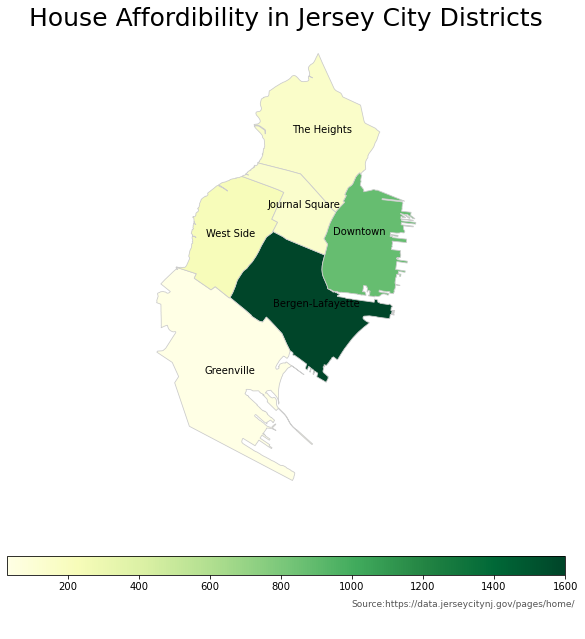

In [73]:
import descartes
#set the value column that will be visualised
variable = 'Affordable Units'
# set the range for the choropleth values
vmin, vmax = 30, 1600
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))
# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('House Affordibility in Jersey City Districts', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source:https://data.jerseycitynj.gov/pages/home/',xy=(0.6, .05),  \
            xycoords='figure fraction', fontsize=9, \
            color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

# create map
merged.plot(column=variable, cmap = 'YlGn', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

for idx, row in merged.iterrows():
    plt.annotate(s=row['District'], xy=row['coords'],horizontalalignment='center')


In [77]:
jc_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

choropleth = folium.Choropleth(
    geo_data= geo_jcc1,   
    name='choropleth',
    data=merged,
    columns= ['District','Affordable Units'],
    key_on='feature.properties.District',
    fill_color='YlGn', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Available Afforable House units',
    highlight=True
).add_to(jc_map)
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['District'], style=style_function, labels=False))


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jc_merged['Latitude'],jc_merged['Longitude'], jc_merged['Neighborhood'], jc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(jc_map)
       
# display map
jc_map

## Let's explore the food venues further

In [79]:
unique_ven = jc_venues['Venue id'].unique()
unique_ven1 = pd.DataFrame(unique_ven)
print(len(unique_ven1))

1053


In [80]:
unique_cat = jc_venues['Venue Category'].unique()
unique_cat1 = pd.DataFrame(unique_cat).reset_index(drop = True)
unique_cat1.columns = ['Category']
print(unique_cat1)

                                     Category
0                          Italian Restaurant
1                         Fried Chicken Joint
2                                  Bagel Shop
3                          Spanish Restaurant
4                                 Pizza Place
5                                      Bakery
6                                    Pharmacy
7                              Sandwich Place
8                                        Bank
9                          Miscellaneous Shop
10                         Chinese Restaurant
11                                 Donut Shop
12                              Grocery Store
13                                   Bus Stop
14                                  Gift Shop
15                             Baseball Field
16                                        Bar
17                               Intersection
18                               Tennis Court
19                                       Park
20                                

In [214]:
only_food = only_food[~only_food['Venue Category'].str.contains('Fast')].reset_index(drop = True)
check3

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Heights,Hudson City,40.748321,-74.049258,McDonald's,40.743788,-74.050718,Fast Food Restaurant,4c5474def5f3d13a0ab82ffa
1,Heights,Washington Village,40.743890,-74.042810,McDonald's,40.743788,-74.050718,Fast Food Restaurant,4c5474def5f3d13a0ab82ffa
2,Heights,Mount Pleasant,40.750580,-74.043310,McDonald's,40.756408,-74.044594,Fast Food Restaurant,4c3103d1a0ced13aed07136e
3,Heights,Sparrow Hill,40.743169,-74.060263,McDonald's,40.742685,-74.060032,Fast Food Restaurant,4e4e13eabd4101d0d7a1afb9
4,Heights,Resorvior,40.737355,-74.056950,White Castle,40.735656,-74.063342,Fast Food Restaurant,4b481888f964a5201c4826e3
5,Heights,Resorvior,40.737355,-74.056950,McDonald's,40.742685,-74.060032,Fast Food Restaurant,4e4e13eabd4101d0d7a1afb9
6,Heights,Waverly,40.739196,-74.050625,McDonald's,40.743788,-74.050718,Fast Food Restaurant,4c5474def5f3d13a0ab82ffa
7,Downtown,Newport,40.729255,-74.034927,Chick-fil-A,40.726879,-74.038444,Fast Food Restaurant,5643571c498ed6a787345876
8,Downtown,Newport,40.729255,-74.034927,Taco Bell,40.727021,-74.038328,Fast Food Restaurant,4b6b10f0f964a5206ef02be3
9,Downtown,Newport,40.729255,-74.034927,McDonald's,40.726501,-74.038700,Fast Food Restaurant,4bf5553ecad2c928a9e49c99


In [159]:
values = ['Restaurant','Diner','BBQ','Steak','Salad','Breakfast']
only_food = jc_venues[jc_venues['Venue Category'].str.contains('|'.join(values))].reset_index(drop = True)
only_food.head(20)

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7
5,Downtown,Van Vorst Park,40.718943,-74.047234,Dolma,40.716355,-74.045931,Middle Eastern Restaurant,56324ce6498e41c8d799402a
6,Downtown,Van Vorst Park,40.718943,-74.047234,Saigon Cafe,40.721507,-74.045933,Vietnamese Restaurant,4a436822f964a52081a61fe3
7,Downtown,Van Vorst Park,40.718943,-74.047234,Broa,40.718589,-74.043527,Portuguese Restaurant,549a08d5498ebc7d8c46bd80
8,Downtown,Van Vorst Park,40.718943,-74.047234,Roman Nose,40.720072,-74.043129,Italian Restaurant,506b26c9e0e20dfe4b126566
9,Downtown,Van Vorst Park,40.718943,-74.047234,Skinner's Loft,40.720523,-74.043832,American Restaurant,49c39da7f964a52065561fe3


In [215]:
only_food = only_food[~only_food['Venue Category'].str.contains('Fast')].reset_index(drop = True)
only_food

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7
5,Downtown,Van Vorst Park,40.718943,-74.047234,Dolma,40.716355,-74.045931,Middle Eastern Restaurant,56324ce6498e41c8d799402a
6,Downtown,Van Vorst Park,40.718943,-74.047234,Saigon Cafe,40.721507,-74.045933,Vietnamese Restaurant,4a436822f964a52081a61fe3
7,Downtown,Van Vorst Park,40.718943,-74.047234,Broa,40.718589,-74.043527,Portuguese Restaurant,549a08d5498ebc7d8c46bd80
8,Downtown,Van Vorst Park,40.718943,-74.047234,Roman Nose,40.720072,-74.043129,Italian Restaurant,506b26c9e0e20dfe4b126566
9,Downtown,Van Vorst Park,40.718943,-74.047234,Skinner's Loft,40.720523,-74.043832,American Restaurant,49c39da7f964a52065561fe3


In [217]:
unique_cat3 = only_food['Venue Category'].unique()
unique_cat3

array(['Italian Restaurant', 'Spanish Restaurant', 'Chinese Restaurant',
       'New American Restaurant', 'Japanese Restaurant',
       'Middle Eastern Restaurant', 'Vietnamese Restaurant',
       'Portuguese Restaurant', 'American Restaurant',
       'Mexican Restaurant', 'Thai Restaurant', 'Australian Restaurant',
       'Ramen Restaurant', 'Restaurant', 'Seafood Restaurant',
       'Lebanese Restaurant', 'BBQ Joint', 'Falafel Restaurant',
       'Steakhouse', 'Korean Restaurant', 'French Restaurant',
       'Cuban Restaurant', 'Latin American Restaurant',
       'Colombian Restaurant', 'Asian Restaurant', 'Caribbean Restaurant',
       'Hawaiian Restaurant', 'South American Restaurant',
       'Indian Restaurant', 'Filipino Restaurant',
       'North Indian Restaurant', 'Mediterranean Restaurant',
       'Sushi Restaurant', 'Modern European Restaurant',
       'Turkish Restaurant', 'Theme Restaurant', 'Bed & Breakfast',
       'South Indian Restaurant', 'Diner', 'African Restaurant

In [216]:
only_food.shape

(666, 9)

In [218]:
uniq_id = only_food['Venue id'].unique()
print(len(uniq_id))

219


In [163]:
check = only_food.groupby(['Venue id','Neighborhood', 'Venue'])['Venue Category'].count()
check

Venue id                  Neighborhood          Venue                                                       
43a26468f964a520322c1fe3  Harsimus Cove         LITM                                                            1
                          Liberty Harbor        LITM                                                            1
                          Van Vorst Park        LITM                                                            1
458947a1f964a520db3f1fe3  Hoboken Yards         Satay                                                           1
45acb4cbf964a52063411fe3  Exchange Place        Honshu                                                          1
                          Gregory Park          Honshu                                                          1
                          Harborside            Honshu                                                          1
                          Palus Hook            Honshu                                       

In [219]:
venue_likes = only_food.drop_duplicates(subset ="Venue id", keep = 'first') 
venue_likes

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7
5,Downtown,Van Vorst Park,40.718943,-74.047234,Dolma,40.716355,-74.045931,Middle Eastern Restaurant,56324ce6498e41c8d799402a
6,Downtown,Van Vorst Park,40.718943,-74.047234,Saigon Cafe,40.721507,-74.045933,Vietnamese Restaurant,4a436822f964a52081a61fe3
7,Downtown,Van Vorst Park,40.718943,-74.047234,Broa,40.718589,-74.043527,Portuguese Restaurant,549a08d5498ebc7d8c46bd80
8,Downtown,Van Vorst Park,40.718943,-74.047234,Roman Nose,40.720072,-74.043129,Italian Restaurant,506b26c9e0e20dfe4b126566
9,Downtown,Van Vorst Park,40.718943,-74.047234,Skinner's Loft,40.720523,-74.043832,American Restaurant,49c39da7f964a52065561fe3


In [220]:
venue_id_list = venue_likes['Venue id'].tolist()
print(len(venue_id_list))

219


In [222]:
url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[43, 20, 5, 86, 14, 54, 85, 83, 257, 281, 83, 339, 29, 66, 50, 55, 112, 100, 84, 29, 99, 34, 246, 21, 85, 57, 7, 119, 71, 35, 11, 13, 4, 25, 4, 17, 9, 28, 83, 33, 21, 17, 10, 6, 3, 6, 12, 4, 6, 0, 1, 1, 3, 42, 105, 27, 66, 4, 2, 1, 18, 40, 60, 112, 92, 16, 14, 21, 36, 71, 5, 30, 19, 31, 49, 31, 5, 34, 7, 73, 11, 4, 33, 7, 6, 17, 111, 195, 170, 98, 82, 26, 5, 10, 143, 115, 65, 22, 197, 72, 39, 254, 70, 87, 36, 177, 20, 133, 54, 255, 133, 18, 276, 107, 65, 33, 10, 57, 11, 9, 5, 75, 5, 1, 6, 1, 35, 25, 21, 15, 13, 5, 8, 17, 0, 1, 13, 14, 6, 10, 4, 2, 13, 9, 6, 19, 61, 6, 2, 56, 15, 4, 24, 1, 4, 1, 2, 1, 75, 12, 0, 22, 7, 0, 1, 1, 6, 24, 13, 3, 0, 9, 32, 3, 11, 8, 0, 7, 10, 0, 0, 2, 0, 3, 26, 40, 10, 6, 5, 14, 2, 1, 1, 1, 33, 2, 0, 23, 259, 138, 13, 123, 18, 36, 33, 108, 28, 67, 13, 106, 38, 46, 69, 34, 42, 7, 2, 4, 1]


In [223]:
print(len(like_list))
print(len(venue_id_list))

219
219


In [224]:
venue_likes['user_likes'] = like_list
venue_likes.head()

<ipython-input-224-5e7433446cb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venue_likes['user_likes'] = like_list


,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,user_likes
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3,43
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18,20
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3,5
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde,86
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7,14


In [225]:
venue_likes = venue_likes[venue_likes.user_likes != 0]
venue_likes.head()

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,user_likes
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3,43
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18,20
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3,5
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde,86
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7,14


In [226]:
venue_likes.shape

(209, 10)

In [227]:
venue_likes.dtypes

District                   object
Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
Venue id                   object
user_likes                  int64
dtype: object

In [228]:
count_nan = venue_likes.isnull().sum()
count_nan

District                  0
Neighborhood              0
Neighborhood Latitude     0
Neighborhood Longitude    0
Venue                     0
Venue Latitude            0
Venue Longitude           0
Venue Category            0
Venue id                  0
user_likes                0
dtype: int64

In [229]:
print(np.percentile(venue_likes['user_likes'], 25))
print(np.percentile(venue_likes['user_likes'], 50))
print(np.percentile(venue_likes['user_likes'], 75))

6.0
21.0
61.0


In [230]:
print(venue_likes['user_likes'].max())
print(venue_likes['user_likes'].min())
print(venue_likes['user_likes'].median())
print(venue_likes['user_likes'].mean())

339
1
21.0
44.56459330143541


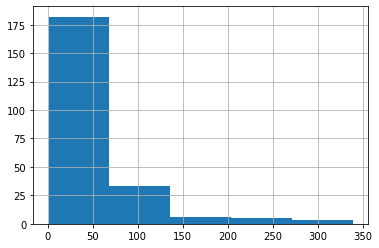

In [176]:
import matplotlib.pyplot as plt
venue_likes['user_likes'].hist(bins=5)
plt.show()

In [231]:
bins = [1.0, 21, 41, 56, 150, 350]
labels = ['Low', 'Okay', 'Good', 'Very good', 'Excellent']
venue_likes['rating'] = pd.cut(venue_likes['user_likes'].astype(float), bins = bins, labels = labels, include_lowest = True)

<ipython-input-231-20a402e6e8cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venue_likes['rating'] = pd.cut(venue_likes['user_likes'].astype(float), bins = bins, labels = labels, include_lowest = True)


In [232]:
venue_likes.head(30)

,District,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue id,user_likes,rating
0,Greenville,Our Lady of Mercy,40.701758,-74.096585,Laico's,40.703348,-74.094860,Italian Restaurant,4b11b88ff964a5201d8323e3,43,Good
1,Greenville,Our Lady of Mercy,40.701758,-74.096585,El Sol Del Caribe,40.707196,-74.092357,Spanish Restaurant,4cb75aa356fca1cdeef85c18,20,Low
2,Greenville,Our Lady of Mercy,40.701758,-74.096585,Fun Buffet Restaurant & Bar,40.705226,-74.099663,Chinese Restaurant,4ae3aa45f964a520eb9721e3,5,Low
3,Downtown,Van Vorst Park,40.718943,-74.047234,Kitchen Step,40.719852,-74.047110,New American Restaurant,56c7bf53cd101732850a7cde,86,Very good
4,Downtown,Van Vorst Park,40.718943,-74.047234,Koro Koro Rice Ball Cafe,40.721236,-74.046158,Japanese Restaurant,5b039222e1f228002c8700f7,14,Low
5,Downtown,Van Vorst Park,40.718943,-74.047234,Dolma,40.716355,-74.045931,Middle Eastern Restaurant,56324ce6498e41c8d799402a,54,Good
6,Downtown,Van Vorst Park,40.718943,-74.047234,Saigon Cafe,40.721507,-74.045933,Vietnamese Restaurant,4a436822f964a52081a61fe3,85,Very good
7,Downtown,Van Vorst Park,40.718943,-74.047234,Broa,40.718589,-74.043527,Portuguese Restaurant,549a08d5498ebc7d8c46bd80,83,Very good
8,Downtown,Van Vorst Park,40.718943,-74.047234,Roman Nose,40.720072,-74.043129,Italian Restaurant,506b26c9e0e20dfe4b126566,257,Excellent
9,Downtown,Van Vorst Park,40.718943,-74.047234,Skinner's Loft,40.720523,-74.043832,American Restaurant,49c39da7f964a52065561fe3,281,Excellent


In [233]:
venue_likes.groupby('rating')['Venue'].count()

rating
Low          108
Okay          35
Good          10
Very good     44
Excellent     12
Name: Venue, dtype: int64

In [278]:
from IPython.display import IFrame
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen', 'Excellent': 'purple'}

jc_venue_map = folium.Map(location = [latitude, longitude], zoom_start=12.5,max_zoom=20,min_zoom = 4)

choropleth = folium.Choropleth(
    geo_data= geo_jcc1,   
    name='choropleth',
    data=merged,
    columns= ['District','Affordable Units'],
    key_on='feature.properties.District',
    fill_color='YlGn', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Available Afforable House units',
    highlight=True
).add_to(jc_venue_map)
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['District'], style=style_function, labels=False))


for name, cat, latitude, longitude, like, rating in zip(venue_likes['Venue'],
                                             venue_likes['Venue Category'],
                                             venue_likes['Venue Latitude'], 
                                             venue_likes['Venue Longitude'],
                                             venue_likes['user_likes'],
                                             venue_likes['rating']):
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating]), 
        tooltip =   '<li><strong>Eateries : '+str(name)+
                    '<li><bold>Type : '+str(cat)+
                    '<li><bold>Likes : '+str(like)+
                    '<li><bold>Rating : '+str(rating)
        ).add_to(jc_venue_map)  

#jc_venue_map.save("maps/Venues likes.html")
jc_venue_map.save('jc_venue_map.html')
IFrame('jc_venue_map.html', width=900, height=1000)

In [262]:
from IPython.display import IFrame
#IFrame('http://stackoverflow.org', width=700, height=350)

In [255]:
pip install chart-studio

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
Note: you may need to restart the kernel to use updated packages.


In [256]:
import chart_studio
username = 'yr05' # your username
api_key = '4xGIjGKU8q2cSFHmKjeb' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [257]:
import chart_studio.plotly as py

In [260]:
py.plot(fig, filename = 'jc_city_project', auto_open=True)

PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure

In [ ]:
from IPython.display import IFrame
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen', 'Excellent': 'purple'}

jc_venue_map = folium.Map(location = [latitude, longitude], zoom_start=12.5,max_zoom=20,min_zoom = 4)

choropleth = folium.Choropleth(
    geo_data= geo_jcc1,   
    name='choropleth',
    data=merged,
    columns= ['District','Affordable Units'],
    key_on='feature.properties.District',
    fill_color='YlGn', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Available Afforable House units',
    highlight=True
).add_to(jc_venue_map)
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['District'], style=style_function, labels=False))


for name, cat, latitude, longitude, like, rating in zip(venue_likes['Venue'],
                                             venue_likes['Venue Category'],
                                             venue_likes['Venue Latitude'], 
                                             venue_likes['Venue Longitude'],
                                             venue_likes['user_likes'],
                                             venue_likes['rating']):
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating]), 
        tooltip =   '<li><strong>Eateries : '+str(name)+
                    '<li><bold>Type : '+str(cat)+
                    '<li><bold>Likes : '+str(like)+
                    '<li><bold>Rating : '+str(rating)
        ).add_to(jc_venue_map)  

#jc_venue_map.save("maps/Venues likes.html")
jc_venue_map.save('jc_venue_map.html')
IFrame('jc_venue_map.html', width=900, height=1000)

In [277]:
from IPython.display import IFrame
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen', 'Excellent': 'purple'}

jc_venue_map = folium.Map(location = [latitude, longitude], zoom_start=12.5,max_zoom=20,min_zoom = 4)

choropleth = folium.Choropleth(
    geo_data= geo_jcc1,   
    name='choropleth',
    data=merged,
    columns= ['District','Affordable Units'],
    key_on='feature.properties.District',
    fill_color='YlGn', # ‘BuGn’, ‘BuPu’, ‘GnBu’, ‘OrRd’, ‘PuBu’, ‘PuBuGn’, ‘PuRd’, ‘RdPu’, ‘YlGn’, ‘YlGnBu’, ‘YlOrBr’, and ‘YlOrRd’.
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Available Afforable House units',
    highlight=True
).add_to(jc_venue_map)
style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['District'], style=style_function, labels=False))


for name, cat, latitude, longitude, like, rating in zip(venue_likes['Venue'],
                                             venue_likes['Venue Category'],
                                             venue_likes['Venue Latitude'], 
                                             venue_likes['Venue Longitude'],
                                             venue_likes['user_likes'],
                                             venue_likes['rating']):
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating]), 
        tooltip =   '<li><strong>Eateries : '+str(name)+
                    '<li><bold>Type : '+str(cat)+
                    '<li><bold>Likes : '+str(like)+
                    '<li><bold>Rating : '+str(rating)
        ).add_to(jc_venue_map)  

#jc_venue_map.save("maps/Venues likes.html")
jc_venue_map.save('jc_venue_map.html')
IFrame('jc_venue_map.html', width=900, height=1000)